In [2]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests
import cv2
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import numpy as np
import pwd
import os

randomPath = f"/Users/{pwd.getpwuid(os.getuid())[0]}/Desktop/PythonCV2/DetectAnythingModel/imgs"
imageGather = os.listdir(randomPath)
def GetImgs(path=str):
    allImgs = []
    for imgName in tqdm(imageGather, desc="Collecting"):
        insideImg = path + "/" + f"{imgName}"
        getImgs = sorted(glob(insideImg))
        for paths in getImgs:
            allImgs.append(paths)
    return allImgs
imgs = GetImgs(randomPath)

Collecting: 100%|██████████| 12562/12562 [00:00<00:00, 80725.93it/s]


This is a pretrained developed by Google that I've taken from Huggingface,
here is the link to the orignial model

https://huggingface.co/google/vit-base-patch16-224

10855
Predicted class: refrigerator, icebox


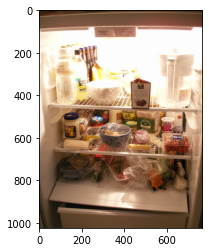

In [16]:
randomIndx = np.random.randint(len(imageGather))
print(randomIndx)
randImg = imgs[randomIndx]
url = randImg
image = Image.open(url)
plt.imshow(image)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
prediction = model.config.id2label[predicted_class_idx]
print("Predicted class:",prediction)